In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from highlight_text import fig_text
from pyfonts import load_font
from utils import add_labels, get_label_rotation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df1 = pd.read_csv("data/employment.csv")
df1.drop(columns="disability", inplace=True)
df1["metric"] = "Employment"
df1.rename(columns={
    "count_employed": "value"
}, inplace=True)
df1_female = df1[df1["sex"]=="Female"]
df1_male = df1[df1["sex"]=="Male"]
df1 = df1_female.merge(
    df1_male,
    left_on=["island", "year", "age", "metric"],
    right_on=["island", "year", "age", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df2 = pd.read_csv("data/education-level.csv")
df2.replace({
   "Early childhood education": "Highschool and below",
   "Primary education": "Highschool and below",
   "Lower secondary education": "Highschool and below",
   "Upper secondary education": "Highschool and below",
   "Post-secondary non-tertiary education": "After highschool",
   "Tertiary education": "After highschool"
}, inplace=True)
df2 = df2[df2["level"] == "After highschool"]
df2["metric"] = "education qualification"
df2.rename(columns={
    "count": "value"
}, inplace=True)
df2 = df2[df2["value"] < 1000]
df2_female = df2[df2["sex"]=="Female"]
df2_male = df2[df2["sex"]=="Male"]
df2 = df2_female.merge(
    df2_male,
    left_on=["island", "year", "age", "level", "metric"],
    right_on=["island", "year", "age", "level", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df3 = pd.read_csv("data/management-position.csv")
df3.drop(columns="categories", inplace=True)
df3["metric"] = "management"
df3.rename(columns={
    "share_female_lead": "value"
}, inplace=True)
df3["value_male"] = 100 - df3["value"]
df3.rename(columns={"value": "value_female"}, inplace=True)

df = pd.concat([df1, df2, df3])
df.drop(columns=["sex_male", "sex_female", "level"], inplace=True)
df.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)
df["name"] = df["island"]+" ("+df["age"]+" yo in "+df["year"].astype(str)+")"

max_per_metric = df.groupby("metric")[["value_female", "value_male"]].max().reset_index()
max_per_metric.columns = ["metric", "max_female", "max_female"]
df = df.merge(max_per_metric, on="metric")
df["max"] = df[['max_female', 'max_female']].max(axis=1)
df["value_female_scaled"] = df["value_female"]/df["max"]*50
df["value_male_scaled"] = df["value_male"]/df["max"]*50
df.sort_values(by=["metric", "island"], inplace=True)
df[df["metric"]=="education qualification"].sort_values("value_female_scaled")

,island,year,value_female,age,metric,value_male,name,max_female,max_female,max,value_female_scaled,value_male_scaled
35,Tuvalu,2017,7.0,55-64,education qualification,35.0,Tuvalu (55-64 yo in 2017),886.0,671.0,886.0,0.395034,1.975169
34,Tuvalu,2017,7.0,55-64,education qualification,16.0,Tuvalu (55-64 yo in 2017),886.0,671.0,886.0,0.395034,0.902935
20,Nauru,2021,14.0,25-54,education qualification,88.0,Nauru (25-54 yo in 2021),886.0,671.0,886.0,0.790068,4.966140
19,Nauru,2021,14.0,25-54,education qualification,11.0,Nauru (25-54 yo in 2021),886.0,671.0,886.0,0.790068,0.620767
23,Nauru,2021,24.0,55-64,education qualification,11.0,Nauru (55-64 yo in 2021),886.0,671.0,886.0,1.354402,0.620767
36,Tuvalu,2017,25.0,55-64,education qualification,16.0,Tuvalu (55-64 yo in 2017),886.0,671.0,886.0,1.410835,0.902935
37,Tuvalu,2017,25.0,55-64,education qualification,35.0,Tuvalu (55-64 yo in 2017),886.0,671.0,886.0,1.410835,1.975169
31,Tuvalu,2017,33.0,25-54,education qualification,174.0,Tuvalu (25-54 yo in 2017),886.0,671.0,886.0,1.862302,9.819413
30,Tuvalu,2017,33.0,25-54,education qualification,119.0,Tuvalu (25-54 yo in 2017),886.0,671.0,886.0,1.862302,6.715576
25,Palau,2020,37.0,55-64,education qualification,82.0,Palau (55-64 yo in 2020),886.0,671.0,886.0,2.088036,4.627540


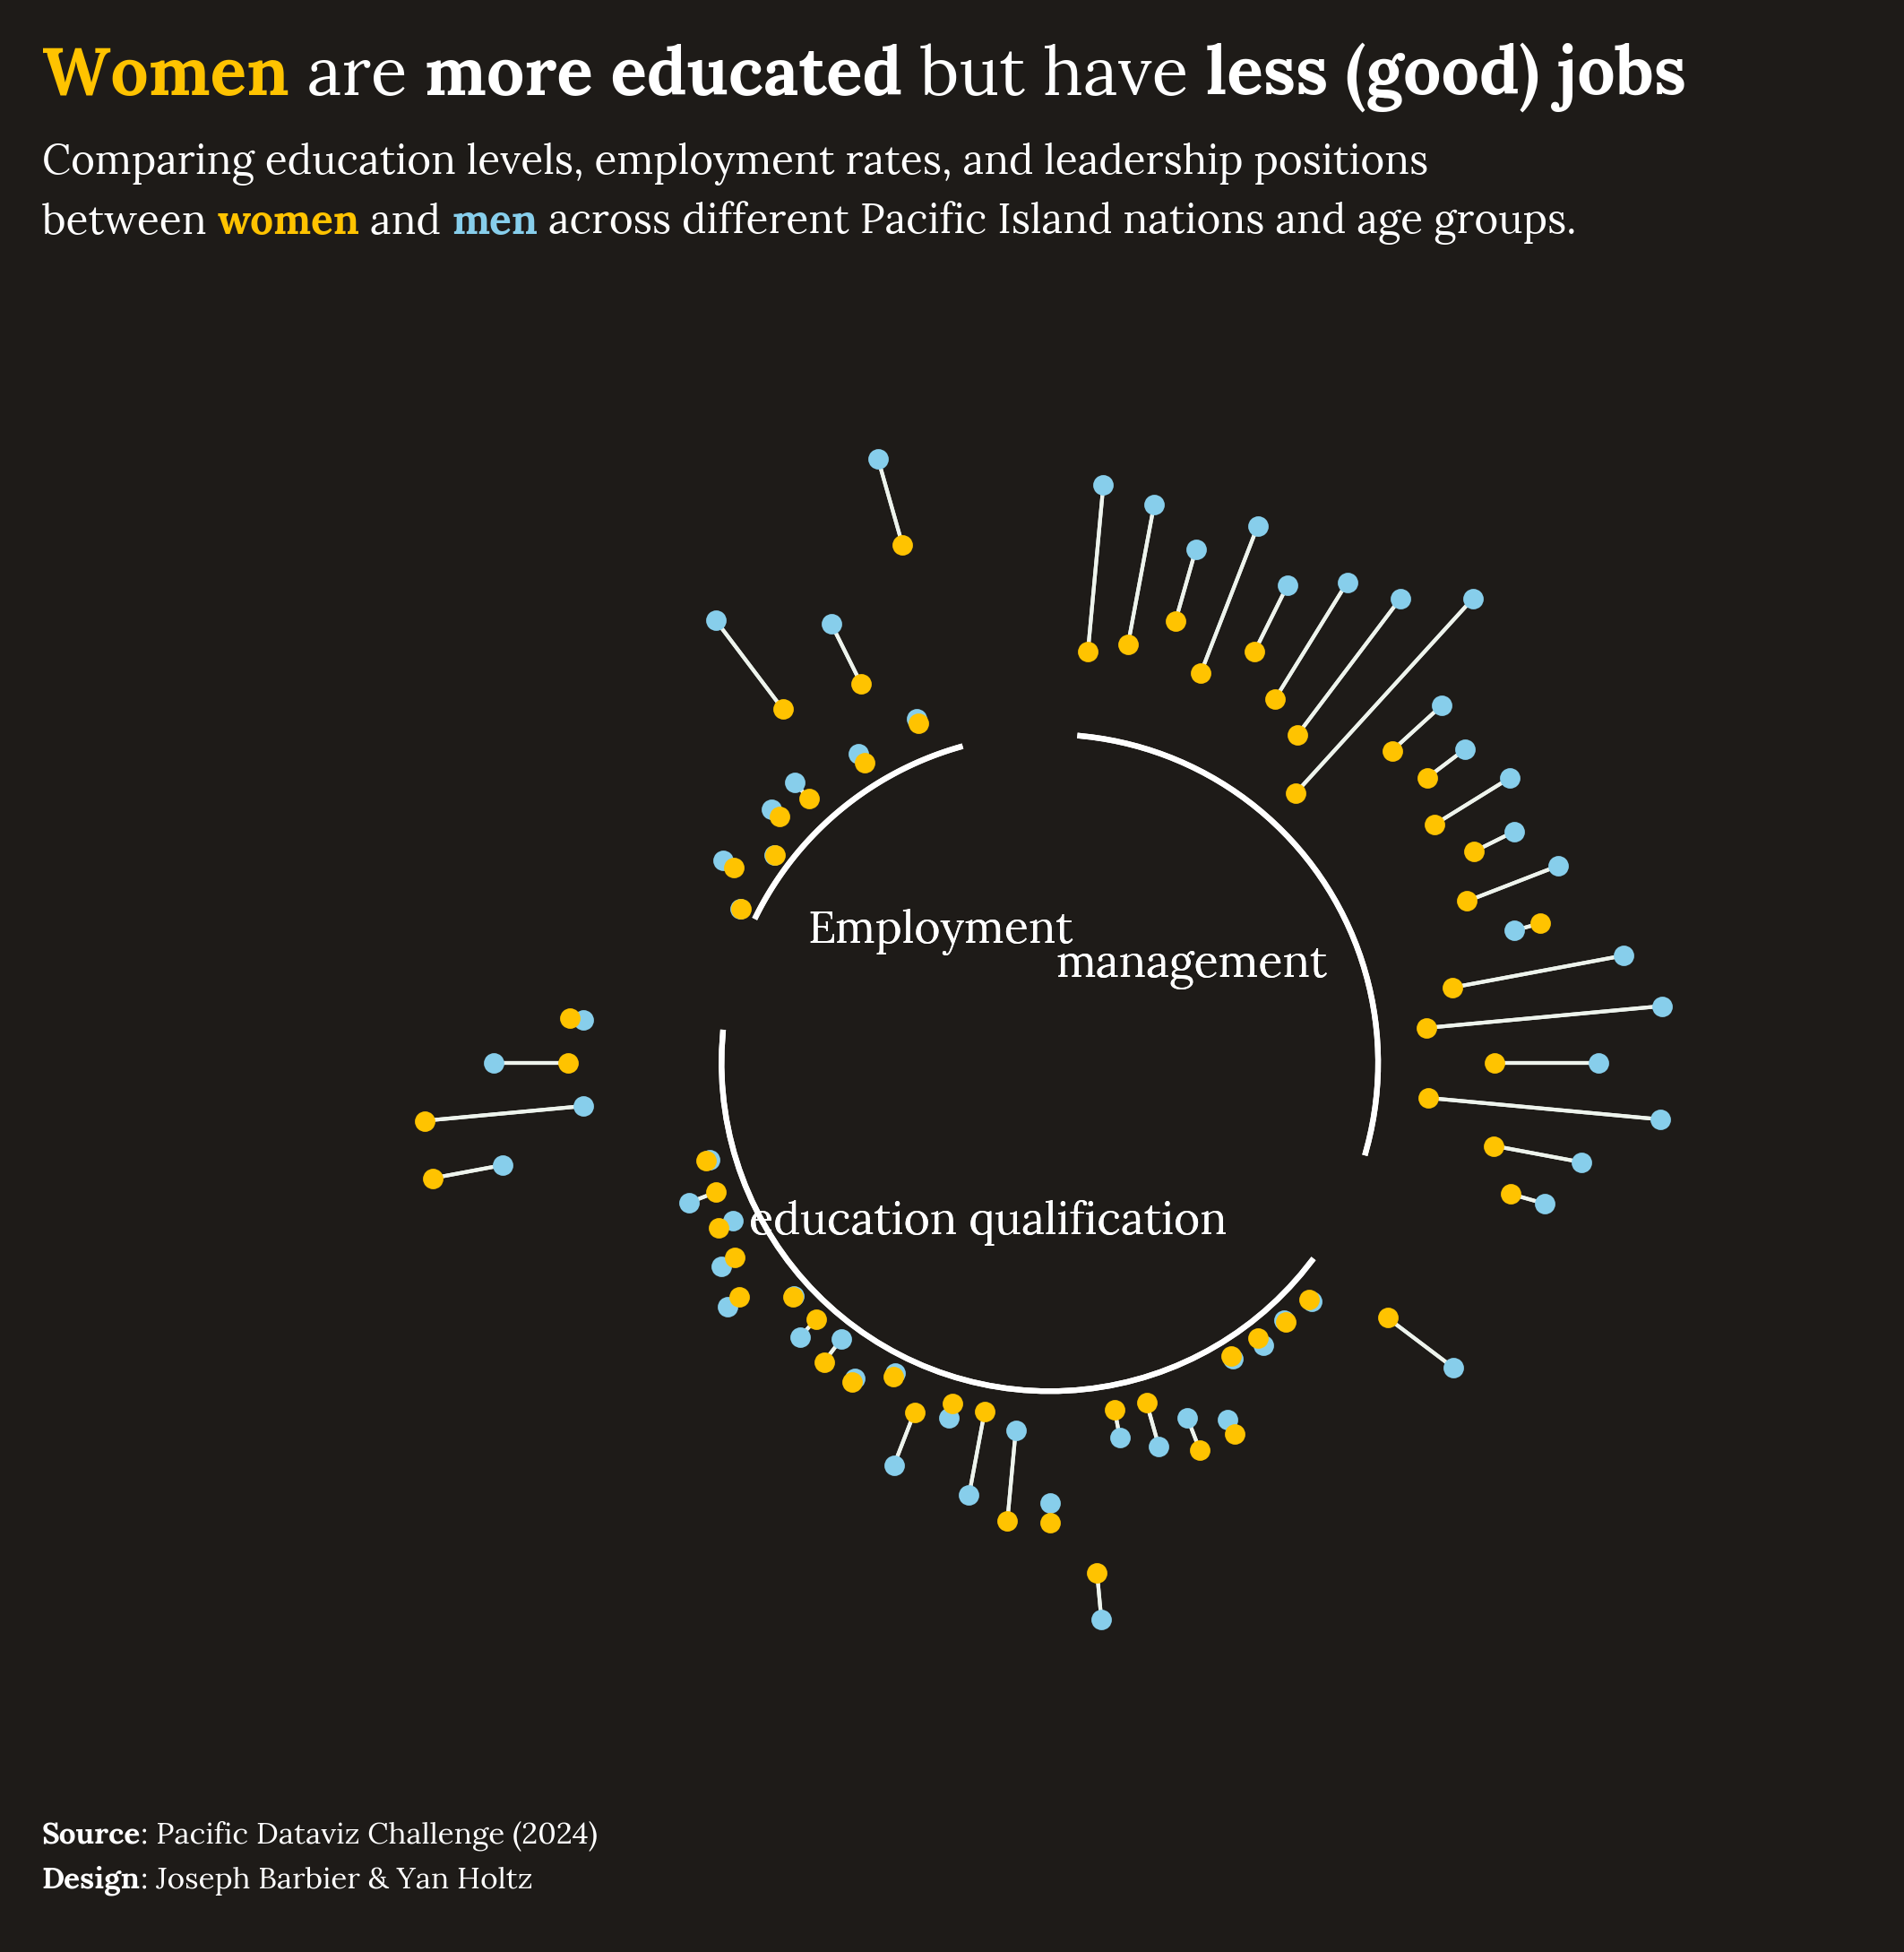

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from highlight_text import fig_text
from pyfonts import load_font
from utils import add_labels, get_label_rotation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df1 = pd.read_csv("data/employment.csv")
df1.drop(columns="disability", inplace=True)
df1["metric"] = "Employment"
df1.rename(columns={
    "count_employed": "value"
}, inplace=True)
df1_female = df1[df1["sex"]=="Female"]
df1_male = df1[df1["sex"]=="Male"]
df1 = df1_female.merge(
    df1_male,
    left_on=["island", "year", "age", "metric"],
    right_on=["island", "year", "age", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df2 = pd.read_csv("data/education-level.csv")
df2.replace({
   "Early childhood education": "Highschool and below",
   "Primary education": "Highschool and below",
   "Lower secondary education": "Highschool and below",
   "Upper secondary education": "Highschool and below",
   "Post-secondary non-tertiary education": "After highschool",
   "Tertiary education": "After highschool"
}, inplace=True)
df2 = df2[df2["level"] == "After highschool"]
df2["metric"] = "education qualification"
df2.rename(columns={
    "count": "value"
}, inplace=True)
df2 = df2[df2["value"] < 1000]
df2_female = df2[df2["sex"]=="Female"]
df2_male = df2[df2["sex"]=="Male"]
df2 = df2_female.merge(
    df2_male,
    left_on=["island", "year", "age", "level", "metric"],
    right_on=["island", "year", "age", "level", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df3 = pd.read_csv("data/management-position.csv")
df3.drop(columns="categories", inplace=True)
df3["metric"] = "management"
df3.rename(columns={
    "share_female_lead": "value"
}, inplace=True)
df3["value_male"] = 100 - df3["value"]
df3.rename(columns={"value": "value_female"}, inplace=True)

df = pd.concat([df1, df2, df3])
df.drop(columns=["sex_male", "sex_female", "level"], inplace=True)
df.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)
df["name"] = df["island"]+" ("+df["age"]+" yo in "+df["year"].astype(str)+")"

max_per_metric = df.groupby("metric")[["value_female", "value_male"]].max().reset_index()
max_per_metric.columns = ["metric", "max_female", "max_female"]
df = df.merge(max_per_metric, on="metric")
df["max"] = df[['max_female', 'max_female']].max(axis=1)
df["value_female_scaled"] = df["value_female"]/df["max"]*50
df["value_male_scaled"] = df["value_male"]/df["max"]*50
df.sort_values(by=["metric", "island"], inplace=True)
df[df["metric"]=="education qualification"].sort_values("value_female_scaled")

def circular_lollipop(df, value, name, group, fig, ax, color, other_values):
    VALUES = df[value].values*2
    OTHER_VALUES = df[other_values].values*2
    LABELS = df[name].values
    GROUP = df[group].values

    PAD = 3
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)

    GROUPS_SIZE = [len(i[1]) for i in df.groupby(group)]

    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    ax.set_theta_offset(np.pi/2)
    ax.set_ylim(-120, 170)
    ax.set_frame_on(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    GROUPS_SIZE = [len(i[1]) for i in df.groupby(group)]
    COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

    # Calculate the minimum and maximum values for each pair
    BOTTOMS = np.minimum(VALUES, OTHER_VALUES)
    TOPS = np.maximum(VALUES, OTHER_VALUES)

    # Plot lines and markers
    for angle, bottom, top in zip(ANGLES[IDXS], BOTTOMS, TOPS):
        ax.plot([angle, angle], [bottom, top], color=line_col, linewidth=1)
    ax.scatter(ANGLES[IDXS], VALUES, color=color, s=20, zorder=10)

    offset = 0 
    for group, size in zip(np.unique(GROUP), GROUPS_SIZE):
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
        ax.plot(x1, [-5] * 50, color=curvedline_col)
        ax.text(
            np.mean(x1), -60, group, color=curvedline_col, fontsize=12, 
            fontweight="bold", ha="center", va="center", font=font
        )
        
        offset += size + PAD

#parameters
background_col = "#1e1b18"
curvedline_col = "white"
line_col = "#eef4ed"
men_col = "skyblue"
women_col = "#ffc300"
annotation_color = "white"
boldfont = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Bold.ttf?raw=true")
font = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Regular.ttf?raw=true")

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": "polar"}, dpi=300)
fig.set_facecolor(background_col)
ax.set_facecolor(background_col)

circular_lollipop(
   df=df,
   value="value_male_scaled",
   name="name",
   group="metric",
   fig=fig,
   ax=ax,
   color=men_col,
   other_values="value_female_scaled"
)
circular_lollipop(
   df=df,
   value="value_female_scaled",
   name="name",
   group="metric",
   fig=fig,
   ax=ax,
   color=women_col,
   other_values="value_male_scaled"
)

# title
text = "<Women> are <more educated> but have <less (good) jobs>"
fig_text(
    x=0.2, y=0.97, s=text, 
    font=font, highlight_textprops=[{'color': women_col, 'font': boldfont}, {'font': boldfont}, {'font': boldfont}], color='white',
    fontsize=18, ha="left", va="top"
)

# subtitle
text = """
Comparing education levels, employment rates, and leadership positions
between <women> and <men> across different Pacific Island nations and age groups.
"""
fig_text(
    x=0.2, y=0.93, s=text, font=font, color='white', fontsize=11, ha="left", va="top",
    highlight_textprops=[{'color': women_col, 'font':boldfont}, {'color': men_col, 'font':boldfont}]
)

# credit
text = """
<Source>: Pacific Dataviz Challenge (2024)
<Design>: Joseph Barbier & Yan Holtz
"""
fig_text(
    x=0.2, y=0.15, s=text, 
    font=font, highlight_textprops=[{'font': boldfont}]*2, color='white',
    fontsize=8, ha="left", va="top"
)

plt.savefig("finalchart.png", bbox_inches="tight", dpi=300)
plt.show()

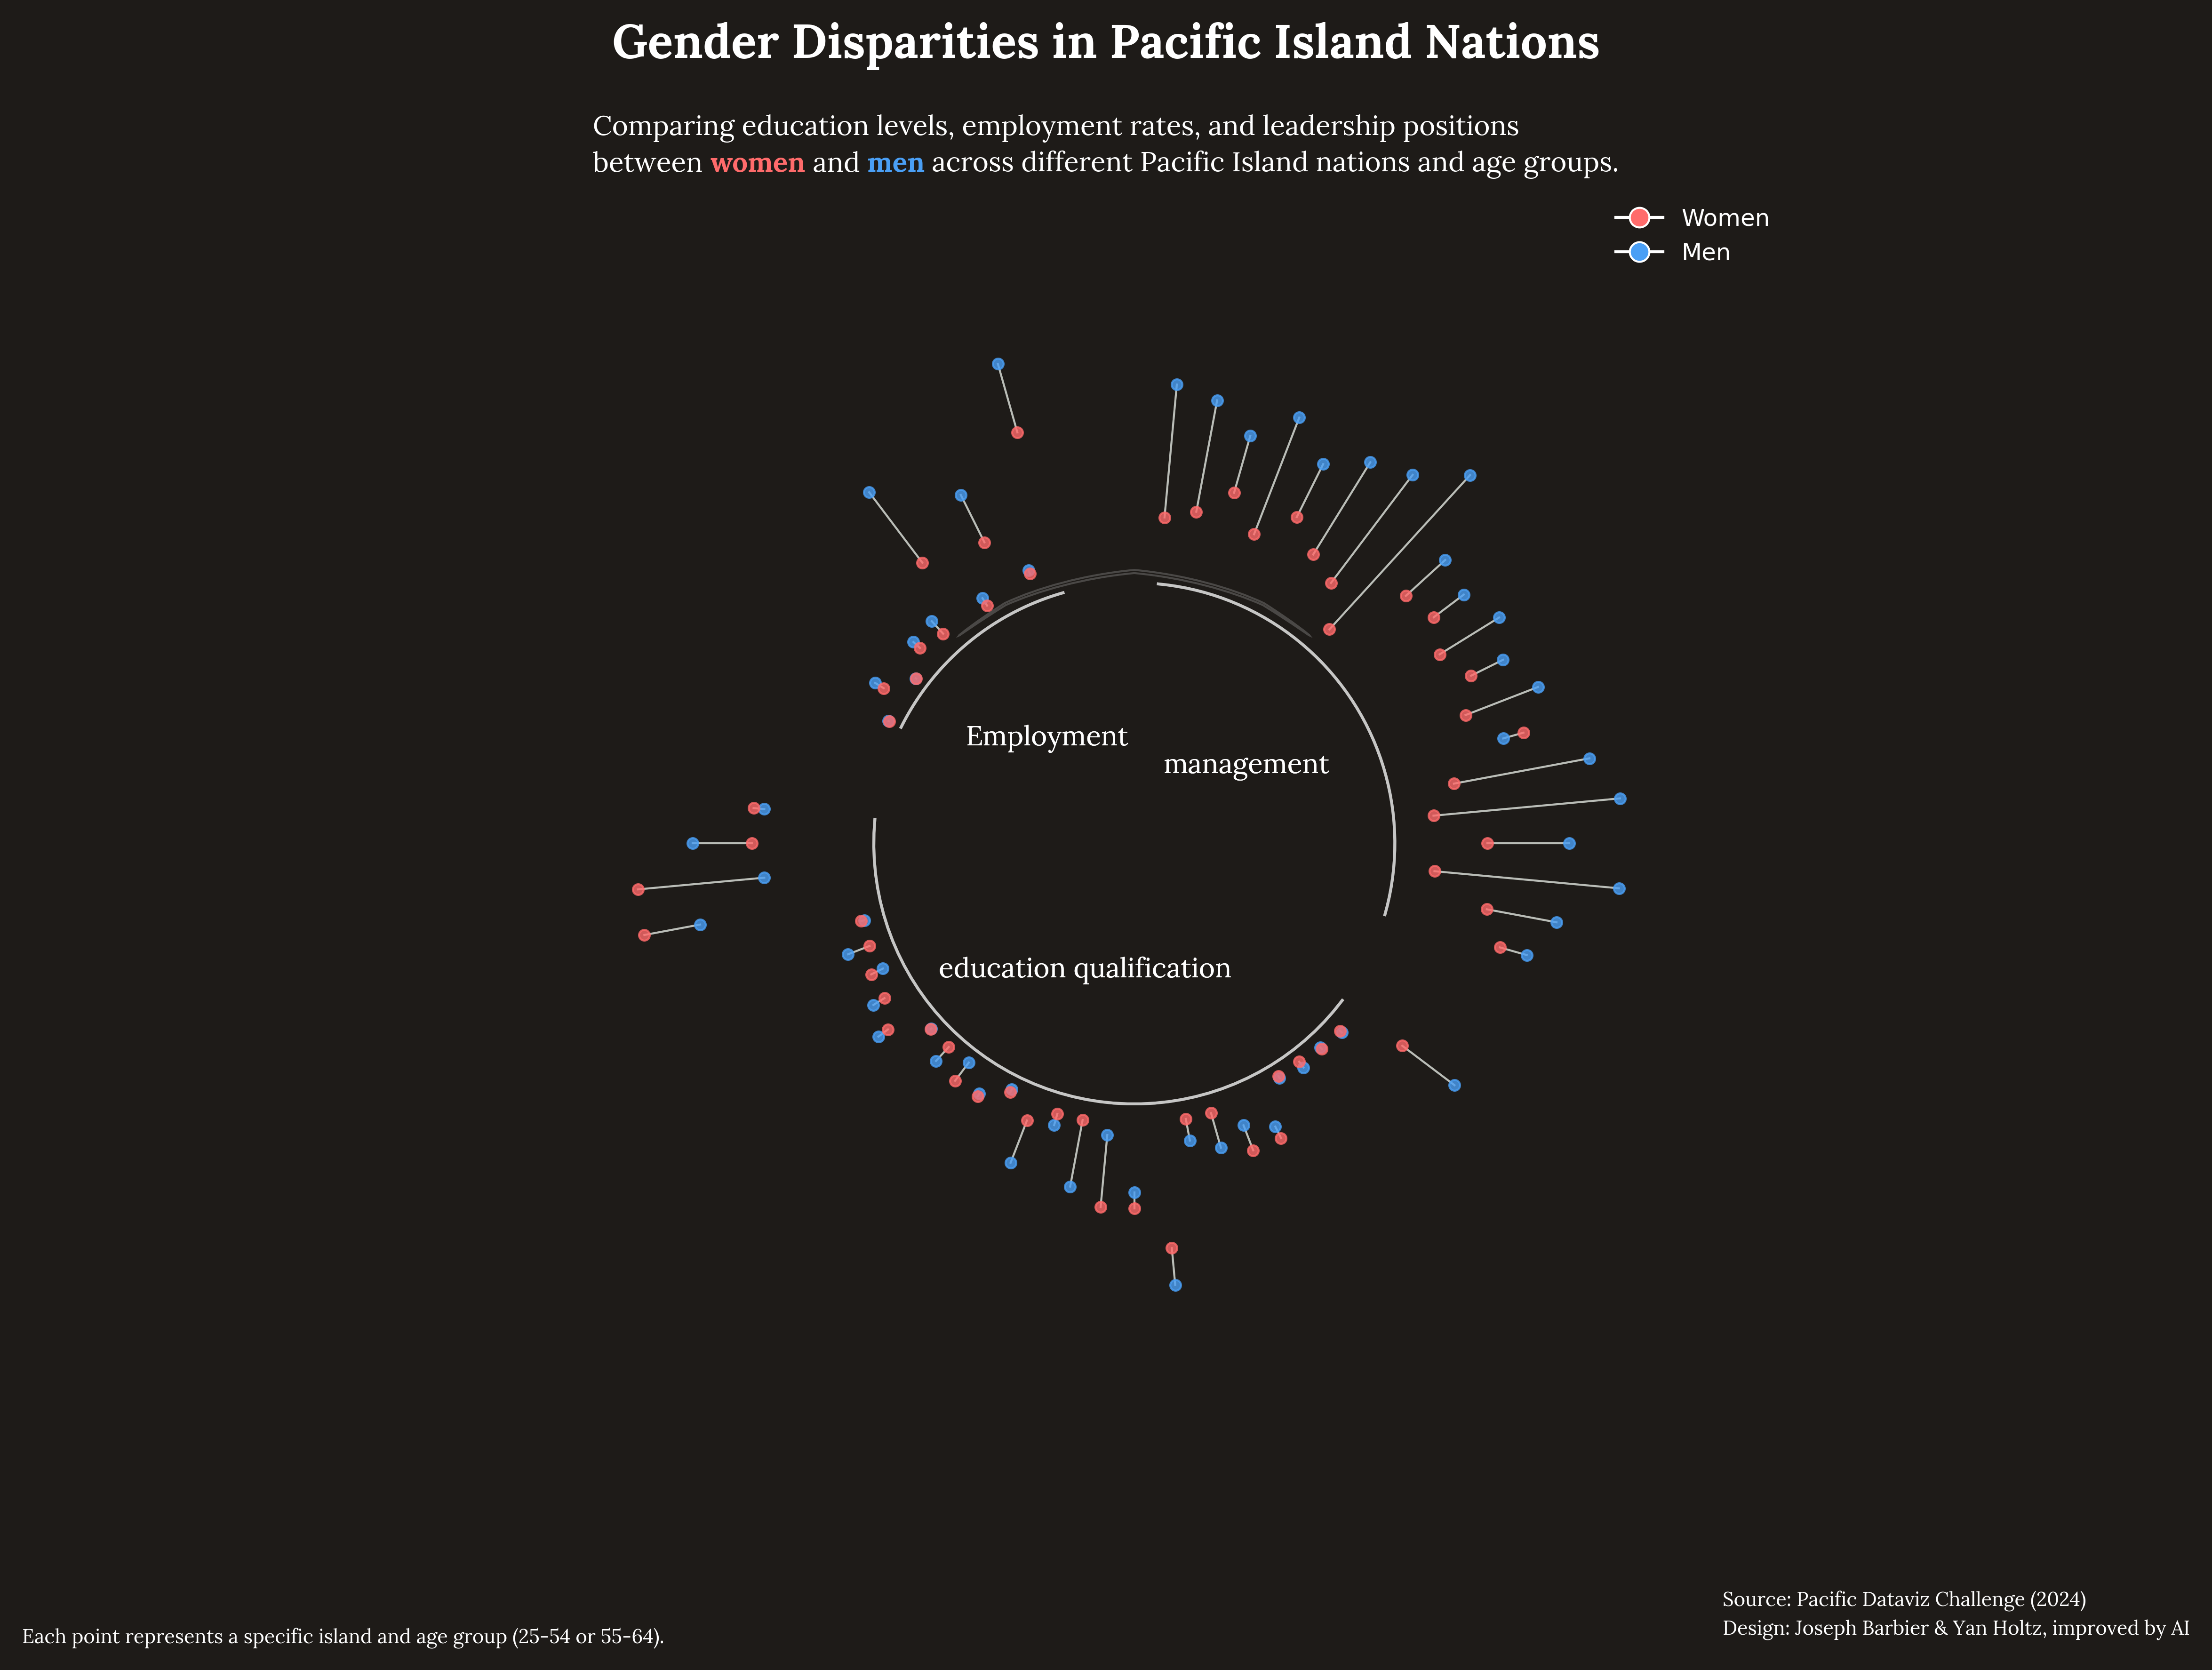

In [3]:
# Parameters
background_col = "#1e1b18"
curvedline_col = "#ffffff"
line_col = "#eef4ed"
men_col = "#4a9ff5"
women_col = "#ff6b6b"
annotation_color = "#ffffff"
boldfont = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Bold.ttf?raw=true")
font = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Regular.ttf?raw=true")

def circular_lollipop(df, value, name, group, fig, ax, color, other_values):
    VALUES = df[value].values * 2
    OTHER_VALUES = df[other_values].values * 2
    LABELS = df[name].values
    GROUP = df[group].values

    PAD = 3
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)

    GROUPS_SIZE = [len(i[1]) for i in df.groupby(group)]

    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    ax.set_theta_offset(np.pi / 2)
    ax.set_ylim(-120, 170)
    ax.set_frame_on(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    GROUPS_SIZE = [len(i[1]) for i in df.groupby(group)]
    COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

    BOTTOMS = np.minimum(VALUES, OTHER_VALUES)
    TOPS = np.maximum(VALUES, OTHER_VALUES)

    for angle, bottom, top in zip(ANGLES[IDXS], BOTTOMS, TOPS):
        ax.plot([angle, angle], [bottom, top], color=line_col, linewidth=1, alpha=0.5)
    scatter = ax.scatter(ANGLES[IDXS], VALUES, color=color, s=30, zorder=10, alpha=0.8)

    offset = 0
    for group, size in zip(np.unique(GROUP), GROUPS_SIZE):
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
        ax.plot(x1, [-5] * 50, color=curvedline_col, alpha=0.5)
        ax.text(
            np.mean(x1), -60, group, color=curvedline_col, fontsize=14,
            fontweight="bold", ha="center", va="center", font=font
        )
        offset += size + PAD

    return scatter

fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={"projection": "polar"}, dpi=300)
fig.set_facecolor(background_col)
ax.set_facecolor(background_col)

scatter_men = circular_lollipop(
    df=df,
    value="value_male_scaled",
    name="name",
    group="metric",
    fig=fig,
    ax=ax,
    color=men_col,
    other_values="value_female_scaled"
)

scatter_women = circular_lollipop(
    df=df,
    value="value_female_scaled",
    name="name",
    group="metric",
    fig=fig,
    ax=ax,
    color=women_col,
    other_values="value_male_scaled"
)

# Legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Women', markerfacecolor=women_col, markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Men', markerfacecolor=men_col, markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, frameon=False, labelcolor='white')

# Title
text = "Gender Disparities in Pacific Island Nations"
fig_text(
    x=0.5, y=0.98, s=text,
    font=boldfont, color='white',
    fontsize=24, ha="center", va="top"
)

# Subtitle
text = """
Comparing education levels, employment rates, and leadership positions
between <women> and <men> across different Pacific Island nations and age groups.
"""
fig_text(
    x=0.5, y=0.93, s=text, font=font, color='white', fontsize=14, ha="center", va="top",
    highlight_textprops=[{'color': women_col, 'font':boldfont}, {'color': men_col, 'font':boldfont}]
)

# Add explanatory text
fig_text(
    x=0.02, y=0.02, s="Each point represents a specific island and age group (25-54 or 55-64).",
    font=font, color='white', fontsize=10, ha="left", va="bottom"
)

# Credit
text = """
Source: Pacific Dataviz Challenge (2024)
Design: Joseph Barbier & Yan Holtz, improved by AI
"""
fig_text(
    x=0.98, y=0.02, s=text,
    font=font, color='white',
    fontsize=10, ha="right", va="bottom"
)

# Add a circular gradient background
center_circle = plt.Circle((0, 0), 0.70, fc='none', ec=curvedline_col, linewidth=1, alpha=0.2)
ax.add_artist(center_circle)

# Add tooltips
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w", alpha=0.4),
                    arrowprops=dict(arrowstyle="->"), fontsize=10, color='black')
annot.set_visible(False)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for scatter in [scatter_men, scatter_women]:
            cont, ind = scatter.contains(event)
            if cont:
                update_annot(ind, scatter)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.tight_layout()
plt.savefig("improved_chart.png", bbox_inches="tight", dpi=300)
plt.show()